In [1]:
from vedo import *
from ipyvtklink.viewer import ViewInteractiveWidget
import numpy as np
import tensorflow as tf
import time

#limit GPU memory ------------------------------------------------
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
  try:
    memlim = 20*1024
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=memlim)])
  except RuntimeError as e:
    print(e)
#-----------------------------------------------------------------

import sys
import os
current = os.getcwd()
parent_directory = os.path.dirname(current)
sys.path.append(parent_directory)
from ICET_spherical import ICET
from linear_corrector import LC

from utils import R_tf
from metpy.calc import lat_lon_grid_deltas
from scipy.spatial.transform import Rotation as R
from matplotlib import pyplot as plt
import copy
import trimesh
%load_ext autoreload
%autoreload 2
%autosave 180
%matplotlib notebook


2023-10-22 13:54:24.674303: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-22 13:54:25.299540: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-22 13:54:26.418037: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-10-22 13:54:26.418126: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-10-22 13:54:28.585651: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-22 13:54:28.587140: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-22 13:54:28.587362: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-22 13:54:28.587536: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Autosaving every 180 seconds


In [2]:
# #test loading individual subsections
# # pl = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-2ndSection - mesh.ply'
# pl = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-3rdSection.ply'
# HD_map = trimesh.load(pl).vertices
# show_nth = 10 #10
# submap = HD_map[::show_nth]
# plt = Plotter(N = 1, axes = 4, bg = (1, 1, 1), interactive = True)
# disp=[]
# disp.append(Points(submap, c = "#CB2314", r = 2, alpha = 0.1)) 
# plt.show(disp, "HD Map")
# ViewInteractiveWidget(plt.window)

In [3]:
#stitch together full HD Map
show_nth = 10 #10
disp=[]
plt2 = Plotter(N = 1, axes = 4, bg = (1, 1, 1), interactive = True)

pl1 = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-1stSection - mesh.ply'
HD_map1 = trimesh.load(pl1).vertices
submap1 = HD_map1[::show_nth]
print(np.shape(submap1))

pl2 = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-2ndSection.ply'
HD_map2 = trimesh.load(pl2).vertices
submap2 = HD_map2[::show_nth]
print(np.shape(submap2))

pl3 = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-3rdSection.ply'
HD_map3 = trimesh.load(pl3).vertices
submap3 = HD_map3[::show_nth]
print(np.shape(submap3))

pl4 = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-4thSection.ply'
HD_map4 = trimesh.load(pl4).vertices
submap4 = HD_map4[::show_nth]
print(np.shape(submap4))

pl5 = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-5thSection.ply'
HD_map5 = trimesh.load(pl5).vertices
submap5 = HD_map5[::show_nth]
print(np.shape(submap5))

# disp.append(Points(submap1, c = "red", r = 2, alpha = 0.1)) 
# disp.append(Points(submap2, c = "orange", r = 2, alpha = 0.1)) 
# disp.append(Points(submap3, c = "yellow", r = 2, alpha = 0.1)) 
# disp.append(Points(submap4, c = "green", r = 2, alpha = 0.1)) 
# disp.append(Points(submap5, c = "blue", r = 2, alpha = 0.1)) 
disp.append(Points(submap1, c = "grey", r = 2, alpha = 0.1)) 
disp.append(Points(submap2, c = "grey", r = 2, alpha = 0.1)) 
disp.append(Points(submap3, c = "grey", r = 2, alpha = 0.1)) 
disp.append(Points(submap4, c = "grey", r = 2, alpha = 0.1)) 
disp.append(Points(submap5, c = "grey", r = 2, alpha = 0.1)) 

plt2.show(disp, "Full HD Map")
ViewInteractiveWidget(plt2.window)

(402473, 3)
(1137566, 3)
(1675711, 3)
(3151530, 3)
(2121251, 3)


ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

In [4]:
#load ground truth
# [sec,nsec,x,y,z,qx,qy,qz,qw]
fn_gt = "/media/derm/06EF-127D4/Newer College Dataset/01_Short_Experiment/registered_poses.csv"
gt = np.loadtxt(fn_gt, delimiter=',',skiprows = 1)
seconds = gt[:, 0]
nano_seconds = gt[:, 1]
xyz = gt[:, 2:5]
qxyzw = gt[:, 5:]
num_poses = qxyzw.shape[0]
poses = np.eye(4, dtype=np.float64).reshape(1, 4, 4).repeat(num_poses, axis=0)
poses[:, :3, :3] = R.from_quat(qxyzw).as_matrix()
poses[:, :3, 3] = xyz
T_CL = np.eye(4, dtype=np.float32)
T_CL[:3, :3] = R.from_quat([0.0, 0.0, 0.924, 0.383]).as_matrix() #was this --1134.97 deg
T_CL[:3, 3] = np.array([-0.084, -0.025, 0.050], dtype=np.float32) #was this
poses = np.einsum("nij,jk->nik", poses, T_CL)
initial_pose = np.linalg.inv(poses[0]) 
poses_timestamps = seconds * 10e9 + nano_seconds
poses = np.einsum("ij,njk->nik", np.linalg.inv(poses[0]), poses)


#draw GT trajectory
start_idx = 0
gt_lidarframe = gt[:,2:5]
gt_lidarframe = (poses[start_idx] @ np.append(gt_lidarframe, np.ones([len(gt_lidarframe),1]), axis = 1).T).T
# gt_lidarframe[:,:3] -= gt_lidarframe[start_idx,:3]
#rotate 180 deg about vertical axis to align with LOAM results
# gt_lidarframe[:,:3] = gt_lidarframe[:,:3] @ R.from_euler('xyz', [np.deg2rad(0), np.deg2rad(10.25), np.deg2rad(75.5)]).as_matrix() #test
gt_points = Line(gt_lidarframe[:,:3], c = "red", lw = 4, alpha = 1).legend("Actual Motion of Platform")
disp.append(gt_points)

plt3 = Plotter(N = 1, axes = 4, bg = (1, 1, 1), interactive = True)
plt3.show(disp, "Full HD Map")
ViewInteractiveWidget(plt3.window)

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

In [106]:
#put HD Map and new scan in frame of raw keyframe scan
idx = 600 #test
skip = 100 #10 #how many lidar frames between keyframe and new scan
offset = 0 #2 #1 #0 #no offset here! This makes life sooo much easier!!!
fn1 = "/media/derm/06EF-127D4/Newer College Dataset/01_Short_Experiment/point_clouds/frame_" + str(idx + offset) + ".npy"
fn2 = "/media/derm/06EF-127D4/Newer College Dataset/01_Short_Experiment/point_clouds/frame_" + str(idx + skip + offset) + ".npy"
pc1 = np.load(fn1)
pc2 = np.load(fn2)
plt = Plotter(N = 1, axes = 1, bg = (1, 1, 1), interactive = True) #axes = 4 (simple), 1(scale)
disp=[]

submap = np.concatenate((submap1, submap2, submap3, submap4, submap5), axis = 0) #full scene
# submap = np.concatenate((submap2, submap3, submap4), axis = 0) #test
# submap = submap4 #test
print(np.shape(submap))

#transform everything to pc1 frame
pc2_in_pc1_frame = (np.linalg.pinv(poses[idx]) @ poses[idx+skip] @ np.append(pc2, np.ones([len(pc2),1]), axis=1).T).T
pc2_in_pc1_frame = pc2_in_pc1_frame[:,:3] #remove extra axis
submap_in_pc1_frame = (np.linalg.pinv(poses[idx]) @ initial_pose @ np.append(submap, np.ones([len(submap),1]), axis =1).T).T
submap_in_pc1_frame = submap_in_pc1_frame[:,:3]

# debug: try downsampling submap based on how far away each point is from ego platform
rads = np.sqrt(np.sum(submap_in_pc1_frame**2, axis = 1))
# submap_in_pc1_frame = submap_in_pc1_frame[np.argwhere(rads < 50)[:,0]] # simple distance cutoff (bad)
#randomly drop points proportional to their distance from origin ~~~~~~~
# rel_rads = rads/max(rads)
# randy = np.random.rand(len(rel_rads))
# submap_in_pc1_frame = submap_in_pc1_frame[np.where(randy + rel_rads**(1/3) < 1)]
# submap_in_pc1_frame = submap_in_pc1_frame[np.where(randy + rel_rads**(1/2) < 0.8)]

#test
rel_rads = (1-rads/max(rads))**4
sampled_rads = np.random.choice(np.linspace(0,len(rads)-1, len(rads)), 1_000_000, replace=False, p=rel_rads/np.sum(rel_rads)).astype(int)
print(sampled_rads)
submap_in_pc1_frame = submap_in_pc1_frame[sampled_rads,:]
print(np.shape(submap_in_pc1_frame))
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#remove points from HD Map far outside FOV of sensor
phis = LC.c2s(LC, submap_in_pc1_frame)[:,2]
not_too_low = np.argwhere(phis > 3*np.pi/8)[:,0]
# print(np.shape(not_too_low))
not_too_high = np.argwhere(phis < 5*np.pi/8)[:,0]
# print(len(not_too_high))
good_phis = np.intersect1d(not_too_high, not_too_low)
# print(len(good_phis))
submap_in_pc1_frame = submap_in_pc1_frame[good_phis,:]

# DRAW SUBMAP and SCANS 1, 2
print(np.shape(submap_in_pc1_frame))
disp.append(Points(submap_in_pc1_frame, c = "black", r = 2, alpha = 0.5)) ##CB2314
disp.append(Points(pc1, c = '#a65852', r = 3)) #red
# disp.append(Points(pc2_in_pc1_frame, c = '#2c7c94', r = 3)) #blue

plt.show(disp, "05 Quad With Dynamics Frame #" + str(idx))
ViewInteractiveWidget(plt.window)

(8488531, 3)
[ 923812  285375  496755 ... 2874154 1349666  813666]
(1000000, 3)
(944425, 3)


ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

# Run VICET on single frame

In [107]:
A0 = np.array([0., 0., 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0])
max_buffer = 0.5 

dc = LC(cloud1 = submap_in_pc1_frame, cloud2 = pc1, fid = 50, niter = 50, 
        draw = True, mnp = 50, RM = False, solver = '12_state', 
        max_buffer = max_buffer, A0 = A0)
# dc = LC(cloud1 = submap_in_pc1_frame, cloud2 = np.flip(pc1, axis=0), fid = 60, niter = 50, 
#         draw = True, mnp = 50, RM = False, solver = '12_state', 
#         max_buffer = max_buffer, A0 = A0)
# dc = LC(cloud1 = pc1, cloud2 = pc2_in_pc1_frame, fid = 60, niter = 50, 
#         draw = True, mnp = 50, RM = False, solver = '12_state', 
#         max_buffer = max_buffer, A0 = A0)

ViewInteractiveWidget(dc.plt.window)

A0:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0107 -0.0237 -0.0031 -0.001  -0.0002  0.0032] 
 [-0.0051  0.1087  0.0087  0.001   0.0004 -0.0028]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.028  -0.0098 -0.0054 -0.0019 -0.0005  0.0035] 
 [0.0091 0.1212 0.0141 0.0019 0.0008 0.0024]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0329 -0.026  -0.0069 -0.0028 -0.0007  0.0059] 
 [ 0.007   0.1926  0.0184  0.003   0.0013 -0.0002]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0349 -0.0377 -0.0078 -0.0037 -0.001   0.0079] 
 [ 0.0041  0.2471  0.0216  0.0041  0.0016 -0.0023]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.041  -0.0305 -0.0083 -0.0044 -0.0012  0.0085] 
 [ 0.0103  0.2529  0.0236  0.0052  0.002  -0.0002]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0451 -0.0242 -0.0088 -0.0051 -0.0015  0.009 ] 
 [0.0158 0.2577 0.0253 0.0062 0.0023 0.0013]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.049  -0.0193 -0.0091 -0.0056 -0.0017  0.0094] 
 [0.0219 0.2619 0.0265 0.0

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

[[-3.35559   8.2542    0.145701  1.      ]
 [-3.35429   8.25273   0.146137  1.      ]
 [-3.34605   8.24457   0.138331  1.      ]
 ...
 [-1.06554   5.35482   0.543081  1.      ]
 [-1.0588    5.34666   0.54291   1.      ]
 [-1.05797   5.34504   0.543112  1.      ]]


<IPython.core.display.Javascript object>


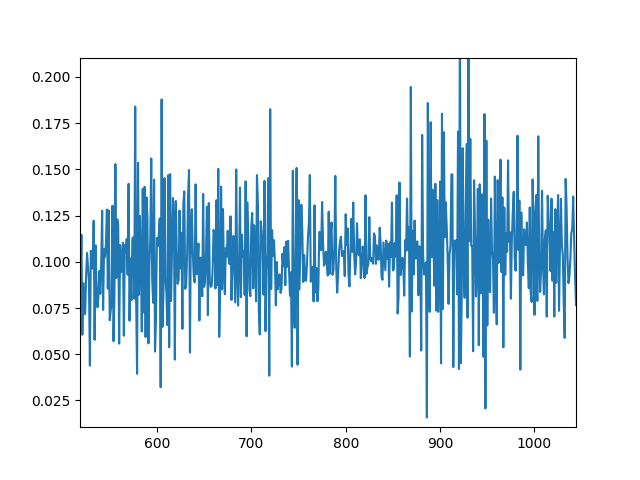

In [108]:
#plot velocity of platform...
from matplotlib import pyplot as p

print(gt_lidarframe)

fig, ax = p.subplots()
# ax.plot(np.diff(gt_lidarframe[:,0,]))
# ax.plot(gt_lidarframe[:,0])
ax.plot(np.sqrt(np.diff(gt_lidarframe[:,0])**2 + np.diff(gt_lidarframe[:,1])**2 ))

# Test: Run VIET on $n$ frames 

In [110]:
start_idx = 600
runlen = 10
noise_scale = 0.01 #set inital pose randomization

submap = np.concatenate((submap1, submap2, submap3, submap4, submap5), axis = 0) #full scene

A_hist = np.zeros([runlen, 12]) #VICET
VICET_CD_hist = np.zeros(runlen)
VICET_pred_stds = np.zeros([runlen,12])

X_hist_ICP = np.zeros([runlen, 6]) 
X_hist_ICET = np.zeros([runlen, 6]) 

for i in range(runlen):
    
    idx = i + start_idx
    print("starting frame", idx)
    
    #put HD Map and new scan in frame of raw keyframe scan
    offset = 0 #1 #0 #no offset here! This makes life sooo much easier!!!
    fn1 = "/media/derm/06EF-127D4/Newer College Dataset/01_Short_Experiment/point_clouds/frame_" + str(idx + offset) + ".npy"
    pc1 = np.load(fn1)
    
    submap_in_pc1_frame = (np.linalg.pinv(poses[idx]) @ initial_pose @ np.append(submap, np.ones([len(submap),1]), axis =1).T).T
    submap_in_pc1_frame = submap_in_pc1_frame[:,:3]
    
    rads = np.sqrt(np.sum(submap_in_pc1_frame**2, axis = 1))
    rel_rads = (1-rads/max(rads))**4
    sampled_rads = np.random.choice(np.linspace(0,len(rads)-1, len(rads)), 1_000_000, replace=False, p=rel_rads/np.sum(rel_rads)).astype(int)
    submap_in_pc1_frame = submap_in_pc1_frame[sampled_rads,:]

    #remove points from HD Map far outside FOV of sensor
    phis = LC.c2s(LC, submap_in_pc1_frame)[:,2]
    not_too_low = np.argwhere(phis > 3*np.pi/8)[:,0]
    not_too_high = np.argwhere(phis < 5*np.pi/8)[:,0]
    good_phis = np.intersect1d(not_too_high, not_too_low)
    submap_in_pc1_frame = submap_in_pc1_frame[good_phis,:]
    
    #Run VICET ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #seed random start
    A0 = np.array([noise_scale*np.random.randn(), noise_scale*np.random.randn(), 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0])
    max_buffer = 0.5 

    dc = LC(cloud1 = submap_in_pc1_frame, cloud2 = pc1, fid = 60, niter = 50, 
        draw = False, mnp = 50, RM = False, solver = '12_state', 
        max_buffer = max_buffer, A0 = A0)
    
    A_hist[i,:] = dc.A
    VICET_pred_stds[i,:] = dc.pred_stds
    
#     #Run ICP ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#     init = np.array([[1, 0, 0, 0.01*np.random.randn()],
#                      [0.,1, 0, 0.01*np.random.randn()],
#                      [0, 0, 1, 0.],
#                      [0, 0, 0, 1]])
#     icp_rigid_transform, transformed_pc1, _ = trimesh.registration.icp(pc1, submap_in_pc1_frame, initial = init,
#                                                                    threshold = 1e-7, max_iterations=50) #scan to HD Map
#     icp_trans = icp_rigid_transform[:3,3]
#     icp_euls = R.from_matrix(icp_rigid_transform[:3,:3]).as_euler('xyz')
#     X_hist_ICP[i,:] = np.append(icp_trans, icp_euls) 
#     print("\n ICP result:", X_hist_ICP[i,:], "\n")

    #Run NDT (ICET) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    initial_guess = tf.constant([noise_scale*np.random.randn(),noise_scale*np.random.randn(),0.,0.,0.,0.])
    it = ICET(cloud1 = submap_in_pc1_frame, cloud2 = pc1, fid = 50, niter = 10, 
           draw = False, group = 2, RM = False, DNN_filter = False, x0 = initial_guess)
    X_hist_ICET[i,:] = it.X
    print("\n ICET result:", X_hist_ICET[i,:], "\n")
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    

starting frame 600
A0:
 [ 0.01161842 -0.01780835  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0013  0.0058 -0.0055 -0.0004 -0.0002  0.0025] 
 [ 0.0218  0.0115  0.0108 -0.0005  0.0005  0.0008]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0126  0.0272 -0.0099 -0.0009 -0.0004  0.004 ] 
 [ 0.0359  0.0219  0.0193 -0.0005  0.0011  0.0032]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0232  0.0464 -0.0134 -0.0014 -0.0007  0.0049] 
 [ 0.0465  0.0318  0.0264 -0.0002  0.0015  0.0061]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0299  0.0614 -0.0162 -0.0019 -0.0009  0.0056] 
 [0.0483 0.0397 0.0317 0.0004 0.002  0.0084]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0362  0.073  -0.0187 -0.0024 -0.0012  0.006 ] 
 [0.05   0.046  0.0364 0.0009 0.0025 0.0105]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0405  0.0837 -0.0207 -0.0028 -0.0014  0.0064] 
 [0.0554 0.0514 0.0404 0.0016 0.003  0.012 ]
~~~

A: 
 [ 0.0182  0.0515 -0.2344 -0.0077 -0.0545  0.027 ] 
 [ 0.0155  0.0151  0.5661  0.0552  0.0913 -0.009 ]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [ 0.0182  0.0637 -0.2677 -0.0094 -0.0628  0.0276] 
 [ 0.0148  0.0191  0.6481  0.0658  0.1048 -0.0065]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [ 0.0156  0.0747 -0.2952 -0.0112 -0.071   0.0275] 
 [ 0.0131  0.0229  0.7153  0.0764  0.1188 -0.0026]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [ 0.0198  0.0801 -0.2784 -0.0158 -0.0771  0.0279] 
 [ 0.0147  0.0243  0.7108  0.0903  0.1247 -0.0005]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [ 0.0172  0.09   -0.2961 -0.0168 -0.0812  0.0269] 
 [0.0133 0.0275 0.7472 0.0961 0.1307 0.0048]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.0186  0.0966 -0.2909 -0.0183 -0.0833  0.0265] 
 [0.0141 0.0294 0.7392 0.1001 0.1316 0.0075]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.0178  0.1026 -0.2921 -0.0191 -0.0848  0.0258] 
 [0.0138 0.0313 0.74   0.1025 0.1325 0.0112]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0189  0.1107

A: 
 [-0.0107  0.0682  0.0098  0.0031 -0.0128  0.046 ] 
 [-0.0012  0.0244 -0.0159  0.0058 -0.0057  0.0139]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [-0.0131  0.0729  0.0085  0.0032 -0.0131  0.0458] 
 [-0.0016  0.0265 -0.0133  0.006  -0.0055  0.0164]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0146  0.0784  0.007   0.0032 -0.0134  0.0457] 
 [-0.0019  0.029  -0.0094  0.0064 -0.0053  0.0185]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0161  0.0816  0.0058  0.0032 -0.0136  0.0456] 
 [-0.0021  0.0304 -0.0069  0.0067 -0.0051  0.0206]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0172  0.0845  0.0043  0.0031 -0.0139  0.0455] 
 [-0.0023  0.0317 -0.0036  0.0071 -0.0047  0.022 ]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0192  0.0884  0.0028  0.0032 -0.0141  0.0452] 
 [-0.0027  0.0335 -0.0006  0.0072 -0.0044  0.0235]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.02    0.0904  0.0011  0.0031 -0.0143  0.0451] 
 [-0.0028  0.0345  0.0033  0.0075 -0.0041  0.0249]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~

A: 
 [ 0.0209  0.1618 -0.0226  0.0065 -0.0156  0.0206] 
 [0.0138 0.0881 0.05   0.024  0.0081 0.0322]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [ 0.0214  0.1626 -0.0227  0.0066 -0.0156  0.0207] 
 [0.014  0.0885 0.0504 0.0239 0.0079 0.0324]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [ 0.0194  0.1626 -0.0225  0.0067 -0.0155  0.0205] 
 [0.0133 0.0887 0.0499 0.0237 0.0077 0.033 ]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [ 0.0197  0.1629 -0.0226  0.0068 -0.0156  0.0206] 
 [0.0134 0.0888 0.0509 0.0238 0.0079 0.0331]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.0199  0.1631 -0.0224  0.0068 -0.0156  0.0207] 
 [0.0135 0.0889 0.0507 0.0238 0.0077 0.0332]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0184  0.163  -0.0219  0.0069 -0.0155  0.0206] 
 [0.013  0.089  0.0495 0.0235 0.0074 0.0335]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.0186  0.163  -0.0221  0.007  -0.0154  0.0206] 
 [0.0131 0.089  0.0497 0.0234 0.0073 0.0337]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0177  0.1626 -0.0223  0.007  -0.

A: 
 [ 0.0589  0.1346 -0.029   0.0058 -0.0109  0.0081] 
 [0.015  0.0589 0.0997 0.0342 0.0068 0.0213]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~
A: 
 [ 0.0591  0.1351 -0.0311  0.006  -0.0111  0.008 ] 
 [0.0152 0.0592 0.1022 0.0341 0.0074 0.0216]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~
A: 
 [ 0.0591  0.135  -0.0339  0.0061 -0.0115  0.0079] 
 [0.0153 0.0593 0.1072 0.0343 0.0082 0.0219]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~
A: 
 [ 0.0597  0.1367 -0.0357  0.0064 -0.0117  0.0079] 
 [0.0156 0.0601 0.1087 0.0339 0.0087 0.0224]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~
A: 
 [ 0.0604  0.1383 -0.0368  0.0066 -0.0118  0.0079] 
 [0.0159 0.0608 0.1092 0.0335 0.009  0.0226]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~
A: 
 [ 0.0595  0.1386 -0.0388  0.0068 -0.0121  0.0078] 
 [0.0156 0.0611 0.1123 0.0334 0.0095 0.0231]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~
A: 
 [ 0.0592  0.1394 -0.0422  0.0068 -0.0125  0.0076] 
 [0.0157 0.0617 0.1207 0.034  0.0102 0.0237]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~
A: 
 [ 0.0596  0.1397 -0.0449  0.007  -0.

A: 
 [ 0.0339  0.025  -0.0399 -0.0013 -0.0146  0.0033] 
 [ 0.0103  0.0187  0.1577  0.0411  0.0259 -0.0121]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~
A: 
 [ 0.034   0.0267 -0.0403 -0.0011 -0.0144  0.0035] 
 [ 0.0104  0.0198  0.1566  0.0405  0.0255 -0.0128]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~
A: 
 [ 0.0355  0.0273 -0.0423 -0.0014 -0.0151  0.0034] 
 [ 0.0107  0.0203  0.1634  0.0417  0.0267 -0.0124]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~
A: 
 [ 0.0358  0.0282 -0.0434 -0.0014 -0.0153  0.0034] 
 [ 0.0108  0.0209  0.166   0.0419  0.027  -0.0122]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~
A: 
 [ 0.0374  0.0287 -0.0457 -0.0018 -0.0163  0.0034] 
 [ 0.0111  0.0212  0.1758  0.0439  0.0286 -0.0122]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~
A: 
 [ 0.0387  0.0301 -0.0466 -0.0019 -0.0166  0.0035] 
 [ 0.0114  0.0222  0.178   0.0443  0.0291 -0.0123]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~
A: 
 [ 0.0385  0.0317 -0.0469 -0.0017 -0.0163  0.0036] 
 [ 0.0114  0.0233  0.1763  0.0436  0.0286 -0.0125]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

A: 
 [ 0.0835  0.1438  0.0104 -0.0033 -0.0006 -0.0153] 
 [ 0.0151  0.06    0.0373  0.0174  0.0061 -0.0059]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~
A: 
 [ 0.0825  0.1441  0.0101 -0.0033 -0.0006 -0.0155] 
 [ 0.0149  0.0602  0.0378  0.0174  0.0062 -0.0056]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~
A: 
 [ 0.0832  0.1448  0.0096 -0.0033 -0.0007 -0.0155] 
 [ 0.015   0.0605  0.0388  0.0174  0.0063 -0.0052]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~
A: 
 [ 0.0833  0.1438  0.009  -0.0033 -0.0008 -0.0155] 
 [ 0.0151  0.06    0.0399  0.0175  0.0064 -0.0053]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~
A: 
 [ 0.0827  0.1443  0.0088 -0.0033 -0.0008 -0.0155] 
 [ 0.0149  0.0603  0.0404  0.0176  0.0065 -0.0052]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~
A: 
 [ 0.0833  0.1443  0.0084 -0.0033 -0.0009 -0.0155] 
 [ 0.0151  0.0602  0.0414  0.0176  0.0067 -0.0055]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~
A: 
 [ 0.0839  0.1438  0.0078 -0.0033 -0.0009 -0.0154] 
 [ 0.0152  0.0599  0.0422  0.0176  0.0068 -0.0056]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

A: 
 [ 0.0279  0.1068 -0.0006 -0.0061 -0.0058 -0.0282] 
 [0.0049 0.0506 0.0471 0.0161 0.0074 0.0075]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~
A: 
 [ 0.0277  0.1065 -0.0016 -0.0059 -0.0057 -0.0282] 
 [0.0049 0.0505 0.0479 0.0157 0.0072 0.0076]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~
A: 
 [ 0.0277  0.1059 -0.0021 -0.0059 -0.0057 -0.0283] 
 [0.0049 0.0502 0.0492 0.0158 0.0073 0.0078]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~
A: 
 [ 0.0271  0.1063 -0.0027 -0.0058 -0.0057 -0.0283] 
 [0.0048 0.0504 0.0496 0.0155 0.0071 0.0077]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~
A: 
 [ 0.0282  0.1073 -0.003  -0.0057 -0.0057 -0.0282] 
 [0.005  0.0508 0.0497 0.0154 0.0071 0.0074]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9

 estimated solution vector X: 
 tf.Tensor([ 0.08231196  0.14519244  0.0057832  -0.00058391 -0.00044435 -0.02429551], shape=(6,), dtype=float32)

 ICET result: [ 0.08231196  0.14519244  0.0057832  -0.00058391 -0.00044435 -0.02429551] 

starting frame 608
A0:
 [-0.00280723 -0.00369

iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9

 estimated solution vector X: 
 tf.Tensor([ 0.06419524  0.08306341 -0.0036791  -0.00021192  0.00116321  0.01640486], shape=(6,), dtype=float32)

 ICET result: [ 0.06419524  0.08306341 -0.0036791  -0.00021192  0.00116321  0.01640486] 

starting frame 609
A0:
 [0.0001627  0.00437087 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0018  0.0207 -0.0065 -0.0015 -0.0007 -0.0059] 
 [-0.0015  0.0091  0.0191  0.0047  0.0044  0.013 ]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0022  0.0341 -0.0125 -0.0025 -0.0013 -0.0107] 
 [-0.0023  0.0164  0.034   0.008   0.0078  0.0242]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0024  0.0428 -0.0197 -0.0037 -0.003  -0.0146] 
 [-0.0028  0.021   0.0561  0.0124  0.0127  0.0323]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0061  0.0498 -0.0254 -0.0044 -0.0039 -0.018 ] 
 [-0.0043  0.0249  0.0707 

<IPython.core.display.Javascript object>


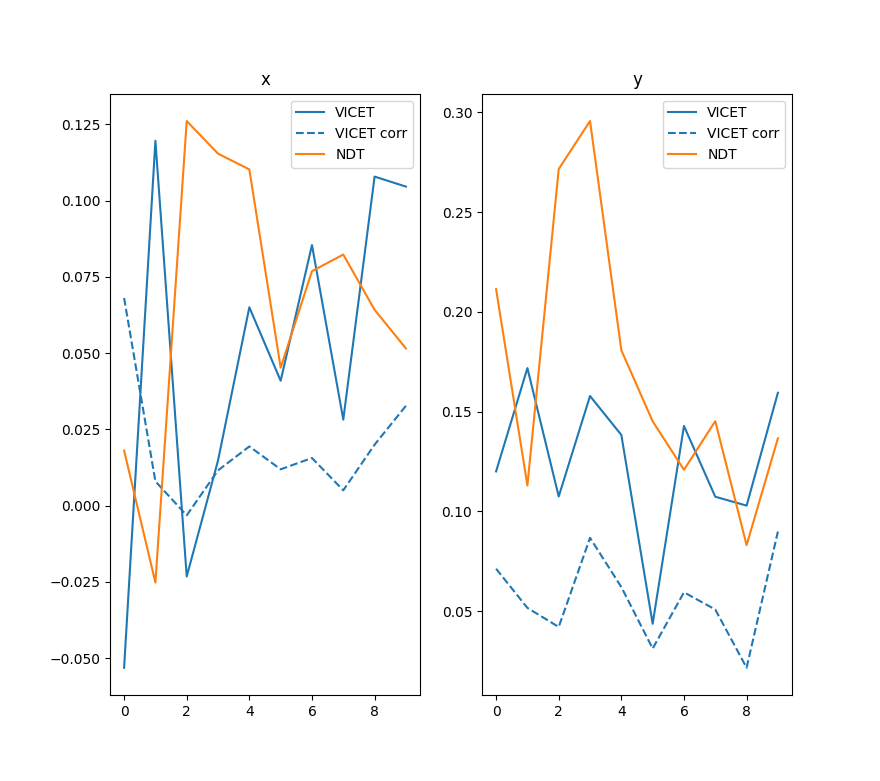

(10, 6)


In [114]:
#plot A_hist results

fig, ax = p.subplots(1,2)

ax[0].set_title("x")
ax[0].plot(A_hist[:,0], label="VICET", color = "C0")
ax[0].plot(A_hist[:,6], label="VICET corr", color = "C0", ls = "--")
# ax[0].plot(X_hist_ICP[:,0], label = "ICP")
ax[0].plot(X_hist_ICET[:,0], label = "NDT", color ="C1")
ax[0].legend(loc="best")

ax[1].set_title("y")
ax[1].plot(A_hist[:,1], label="VICET", color = "C0")
ax[1].plot(A_hist[:,7], label="VICET corr", color = "C0", ls = "--")
# ax[1].plot(X_hist_ICP[:,1], label = "ICP")
ax[1].plot(X_hist_ICET[:,1], label = "NDT",color ="C1")
ax[1].legend(loc="best")

print(np.shape(X_hist_ICP))

In [ ]:
#plot just trajectory --> let's find a good test trajectory
disp =[]
test_traj = gt[:8300,2:5]
# test_traj_points = Line(test_traj, c = "red", lw = 4, alpha = 1).legend("Actual Motion of Platform")
test_traj_points = Points(test_traj, c = "red", alpha = 1).legend("Actual Motion of Platform")
disp.append(test_traj_points)

plt4 = Plotter(N = 1, axes = 1, bg = (1, 1, 1), interactive = True)
plt4.show(disp, "test trajectory")
ViewInteractiveWidget(plt4.window)

In [ ]:
print(np.shape(gt))